# 基本概率问题

In [1]:
from fractions import Fraction

def P(event, space):
    "The Probality of an event, given a sample space"
    return Fraction(len(event & space), len(space))

In [2]:
D = {1, 2, 3, 4, 5, 6}
even = {2, 4, 6}
P(even, D)

Fraction(1, 2)

> 一个罐子里放着23个球，8个白色的，6个蓝色的，9个红色的。 我们从中
> 随机取出6个，那么发生如下的结果的概率是多大？
> * 都是红色
> * 3个蓝色，2个白色，1个红色
> * 有4个是白球

In [3]:
def cross(A, B):
    return {a + b
           for a in A for b in B}
urn = cross('W', '12345678') | cross('B', '123456') | cross('R', '123456789')
urn

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

In [4]:
len(urn)

23

In [5]:
import itertools

def combos(items, n):
    return {' '.join(combo)
           for combo in itertools.combinations(items, n)}
U6 = combos(urn, 6)
len(U6)

100947

In [6]:
import random

random.sample(U6, 10)

['R2 R8 R9 W7 W6 B1',
 'R7 W5 W4 W3 W1 W8',
 'B2 R3 R8 B5 W7 W1',
 'R9 B5 W7 W6 W3 B1',
 'R5 R3 B6 R1 W5 W4',
 'B2 R3 R9 B5 W5 W8',
 'R7 R8 R9 B5 W7 W1',
 'R4 R3 R8 B6 W6 W3',
 'R9 B4 B6 W5 W3 B3',
 'R4 R6 R7 B2 R8 R1']

In [7]:
%%latex

$
\begin{equation} 
23\ choose\ 6 = \frac {23 * 22 * 21 * 20 * 19 *18} {6!} \\
n\ choose\ c = \frac {n!} {(n-c)!*c!}
\end{equation}
$

<IPython.core.display.Latex object>

In [8]:
from math import factorial

def choose(n, c):
    return factorial(n) // (factorial(n - c) * factorial(c))

## 问题1: 所有6个都是红球的概率

In [9]:
red6 = {s for s in U6 if s.count('R') == 6}
P(red6, U6)

Fraction(4, 4807)

### 有多少种拿到6个红球的方法

In [10]:
len(red6)

84

#### 为什么只有84种方法，我们知道有9个红球，从9个红球种拿到6个的方法是：

In [11]:
choose(9, 6)

84

## 问题2: 3蓝2白1红的概率

In [12]:
b3w2r1 = {s for s in U6 if s.count("B") == 3 and
                           s.count("W") == 2 and
                           s.count("R") == 1}
P(b3w2r1, U6)

Fraction(240, 4807)

#### is the same as:

In [13]:
P(b3w2r1, U6) == Fraction(choose(6, 3) * choose(8, 2) * choose(9, 1), len(U6))

True

## 问题3:4个白球的概率

In [14]:
w4 = { s for s in U6 if s.count('W') == 4}
P(w4, U6)

Fraction(350, 4807)

In [15]:
P(w4, U6) == Fraction(choose(8, 4) * choose(15, 2),
                      len(U6))

True

In [16]:
def P(event, space): 
    if is_predicate(event):
        event = such_that(event, space)
    return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, collection): 
    return {e for e in collection if predicate(e)}

# 纸牌概率

In [19]:
suits = "SHDC"
ranks = "A23456789TJQK"
deck = cross(ranks, suits) | {'1W', '2W'}
len(deck)

54

In [20]:
Hands = combos(deck, 5)
assert len(Hands) == choose(54, 5)
random.sample(Hands, 5)

['1W 9C TS TH KC',
 '3S 9H 2W 6D KH',
 'AC 4D TD KC QH',
 'JD 7D 6C 6D 6S',
 'JC AC 4H TD 6S']

## 抽5张牌抽到同花的概率有多大？

In [21]:
def flush(hands):
    return any(hands.count(suit) == 5 for suit in suits) 
P(flush, Hands)

Fraction(22, 13515)

## 抽到4张一样种类的牌的概率有多大？

In [22]:
def four_kind(hand):
    return any(hand.count(rank) == 4 for rank in ranks)
P(four_kind, Hands)

Fraction(13, 48654)

In [23]:
## 够级种抽到4张大王的概率有多大？

In [24]:
GJ_deck = list(deck) + list(deck) + list(deck) + list(deck)
len(GJ_deck)

216

In [25]:
random.sample(GJ_deck, 10)

['3D', '5S', 'JS', '4D', 'KH', '7C', '8C', '3H', '1W', '4H']

In [26]:
len(GJ_deck)//6

36

## native solution, just too much for cup to handle
``` python
GJ_cars = combos(GJ_deck, len(GJ_deck)//6)
len(GJ_cars)
```

In [ ]:
GJ_cards = combos(deck, 10)
    

In [ ]:
    print cards

# 不平均结果分布

在此之前咱们探讨的概率问题的可能结果的概率都是一样的。但是在真实的概率问题上，很多时候结果概率是不均等的，比如说生男孩女孩的概率不是精确的50%, 而且第二个孩子和第一个孩子男女的概率也不一样. 比如丹麦的统计结果是这样的：
>  GG: 121801    GB: 126840
>  BG: 127123    BB: 135138

我们会引入三个新的定义：

* Frequency: 用来描述不同的结果发生的可能性. 可以是一个计数：23423， 也可能是一个比率：0.512
* Distribution: 在一个样本空间，结果和frequency的对应关系
* probability distribution: frequency正规化（加合为1）后的分布.

In [27]:
from __future__ import division
class ProbDist(dict):
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome] / total
            assert self[outcome] >= 0

In [28]:
def P(event, space): 
    if is_predicate(event):
        print 'is predicate'
        event = such_that(event, space)
    if isinstance(space, ProbDist):
        return sum(space[o] for o in space if o in event)
    else:
        return Fraction(len(event & space), len(space))
    
def such_that(predicate, space): 
    if isinstance(space, ProbDist):
        return ProbDist({o:space[o] for o in space if predicate(o)})
    else:
        return {o for o in space if predicate(o)}

## 丹麦两孩家庭的分布情况

In [29]:
DK = ProbDist(GG=121801.0, GB=126840.0,
              BG=127123.0, BB=135138.0)
DK

{'BB': 0.2645086533229465,
 'BG': 0.24882071317004043,
 'GB': 0.24826679089140383,
 'GG': 0.23840384261560926}

In [30]:
def first_girl(outcome):  return outcome[0] == 'G'
def first_boy(outcome):   return outcome[0] == 'B'
def second_girl(outcome): return outcome[1] == 'G'
def second_boy(outcome):  return outcome[1] == 'B'
def two_girls(outcome):   return outcome    == 'GG'

In [31]:
P(first_girl, DK)

is predicate


0.4866706335070131

# 贝叶斯定理和巧克力豆
> m&n巧克力豆是美国的知名品牌，ET都喜欢吃，蓝色豆子是1995年引入的，以前只有(30% 棕色, 20% 黄色, 20% 红色, 10% 绿色, 10% 橙色, 10% 黄棕色). 加入蓝色豆子以后(24% 蓝色 , 20% 绿色, 16% 橙色, 14% 黄色, 13% 红色,  13% 棕色)。
> 假如说我有个朋友，他有两袋子M&M，一代产自1994年，一袋来自1996年。她不告诉我哪个是哪个，她从每个袋子里都拿出一个豆子，一个是黄色的，另一个是绿色的. 那么：黄色的M&M豆子来自1994年的袋子的概率有多大？

我们先定义概率分布


In [32]:
bag94 = ProbDist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = ProbDist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)

In [33]:
bag94
bag96

{'blue': 0.24,
 'brown': 0.13,
 'green': 0.2,
 'orange': 0.16,
 'red': 0.13,
 'yellow': 0.14}

In [34]:
def joint(A, B, sep=" "):
    return ProbDist({a + sep + b : A[a] * B[b] 
                    for a in A
                    for b in B})

In [35]:
MM = joint(bag94, bag96, '')
MM

{'brownblue': 0.07199999999999997,
 'brownbrown': 0.038999999999999986,
 'browngreen': 0.05999999999999997,
 'brownorange': 0.04799999999999998,
 'brownred': 0.038999999999999986,
 'brownyellow': 0.04199999999999998,
 'greenblue': 0.02399999999999999,
 'greenbrown': 0.012999999999999996,
 'greengreen': 0.019999999999999993,
 'greenorange': 0.015999999999999993,
 'greenred': 0.012999999999999996,
 'greenyellow': 0.013999999999999995,
 'orangeblue': 0.02399999999999999,
 'orangebrown': 0.012999999999999996,
 'orangegreen': 0.019999999999999993,
 'orangeorange': 0.015999999999999993,
 'orangered': 0.012999999999999996,
 'orangeyellow': 0.013999999999999995,
 'redblue': 0.04799999999999998,
 'redbrown': 0.025999999999999992,
 'redgreen': 0.03999999999999999,
 'redorange': 0.03199999999999999,
 'redred': 0.025999999999999992,
 'redyellow': 0.02799999999999999,
 'tanblue': 0.02399999999999999,
 'tanbrown': 0.012999999999999996,
 'tangreen': 0.019999999999999993,
 'tanorange': 0.0159999999999

In [36]:
def yellow_and_green(outcome): 
    return 'yellow' in outcome and 'green' in outcome

such_that(yellow_and_green, MM)

{'greenyellow': 0.25925925925925924, 'yellowgreen': 0.7407407407407408}

# 使用贝叶斯定律来解决这个问题

先定义几个事件：
A: 第一个来自94年的袋子，第二个来自96年的袋子
B: 第一个来自96年的袋子，第二个来自94年的袋子

我们先假设两者的概率都是0.5：P(A) = P(B) = 0.5

证据：E：第一个豆子是黄色的，第二个是绿色的

我们想知道事件A在此证据成立情况下的概率：P(A|E)

```
P(A|E) = P(E|A) * P(A) / P(E)

P(E|A) = 0.2 * 0.2 = 0.04
P(E|B) = 0.1 * 0.14 = 0.014
P(E)   = P(E|A) * P(A) + P(E|B) * P(B)
       = 0.04   * 0.5  + 0.014  * 0.5 
       = 0.027

P(A | E) = P(E | A) * P(A) / P(E) 
         = 0.04     * 0.5  / 0.027 
         = 0.7407407407
         
```


# 大富翁游戏
    规则我还没有搞清楚，先看看代码吧

In [37]:
from collections import Counter, deque
import random

board = """GO    A1 CC1 A2  T1 R1 B1  CH1 B2 B3
           JAIL  C1 U1  C2  C3 R2 D1  CC2 D2 D3
           FP    E1 CH2 E2  E3 R3 F1  F2  U2 F3
           G2J   G1 G2  CC3 G3 R4 CH3 H1  T2 H2

        """.split()
def monoploy(steps):
    global here
    here = 0
    CC_deck = Deck('GO JAIL' + 14 * ' ?')
    CH_deck = Deck('GO JAIL C1 E3 H2 R1 R R U -3' + 6 * ' ?')
    doubles = 0
    jail = board.index('JAIL')
    for _ in range(steps):
        d1, d2 = random.randint(1, 6), random.randint(1, 6)
        goto(here + d1 + d2)
        doubles = (doubles + 1) if (d1 == d2) else 0
        if doubles == 3 or board[here] == 'G2J':
            goto(jail)
        elif board[here].startswith('CC'):
            do_card(CC_deck)
        elif board[here].startswith('CH'):
            do_card(CH_deck)
        yield here
        
def goto(square):
    global here
    here = square % len(board)

def Deck(names):
    cards = names.split()
    random.shuffle(cards)
    return deque(cards)

def do_card(deck):
    global here
    card = deck[0]
    deck.rotate(-1)
    if card == 'R' or card == 'U':
        while not board[here].startswith(card):
            goto(here + 1)
    elif card == '-3':
        goto(here - 3)
    elif card != '?':
        goto(board.index(card))

In [38]:
results = list(monoploy(400000))

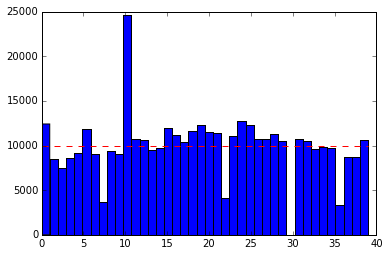

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(results, bins=40)
avg = len(results)/40
plt.plot([0, 39], [avg, avg], 'r--')